<a href="https://colab.research.google.com/github/ibribr/ML/blob/master/MNIST_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# MLP for MNIST
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from matplotlib.colors import ListedColormap

11493376/11490434 [==============================] - 0s 0us/step
train: (60000, 28, 28) (60000,)
Test set: (10000, 28, 28) (10000,)


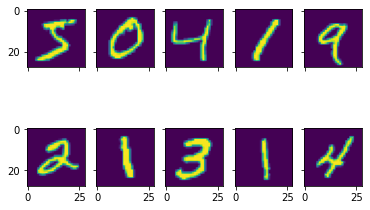

In [3]:
(x_train, y_train), (x_test, y_test)=mnist.load_data()  #60000 samples for training, 10000 samples for testing

print('train:', x_train.shape, y_train.shape)
print('Test set:', x_test.shape, y_test.shape)

# visualize some
fig, ax = plt.subplots(2,5,sharex=True,sharey=True)
ax = ax.flatten()
for i in range(10):
  ax[i].imshow(x_train[i,:])
plt.show()

# prepare the data for training
x_train = x_train.reshape(60000,28*28)
x_train = x_train.astype('float32')/255
x_test = x_test.reshape(10000,28*28)
x_test = x_test.astype('float32')/255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Iteration 1, loss = 2.08688891
Iteration 2, loss = 0.68083734
Iteration 3, loss = 0.46458483
Iteration 4, loss = 0.36273687
Iteration 5, loss = 0.29631744
Iteration 6, loss = 0.24927669
Iteration 7, loss = 0.21545164
Iteration 8, loss = 0.18956088
Iteration 9, loss = 0.16971322
Iteration 10, loss = 0.15260301
Iteration 11, loss = 0.13926022
Iteration 12, loss = 0.12650104
Iteration 13, loss = 0.11662464
Iteration 14, loss = 0.10768282
Iteration 15, loss = 0.09922781
Iteration 16, loss = 0.09236925
Iteration 17, loss = 0.08511171
Iteration 18, loss = 0.07946701
Iteration 19, loss = 0.07390604
Iteration 20, loss = 0.06919768
Iteration 21, loss = 0.06414665
Iteration 22, loss = 0.05965555
Iteration 23, loss = 0.05571421
Iteration 24, loss = 0.05202724
Iteration 25, loss = 0.04799502
Iteration 26, loss = 0.04546952
Iteration 27, loss = 0.04153493
Iteration 28, loss = 0.03848847
Iteration 29, loss = 0.03657637
Iteration 30, loss = 0.03424482
Iteration 31, loss = 0.03215128
Iteration 32, los

<Figure size 432x288 with 0 Axes>

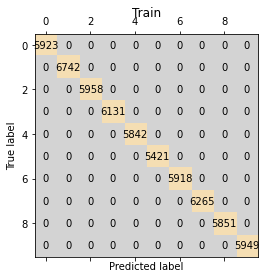

<Figure size 432x288 with 0 Axes>

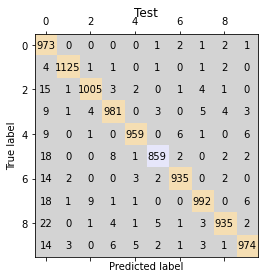

In [10]:
mlp = MLPClassifier(solver='sgd', activation='logistic',alpha=1e-4,hidden_layer_sizes=(100,30),
                    random_state=1, max_iter=100,verbose=True, learning_rate_init=.1, tol=1e-4)
mlp.fit(x_train, y_train)

print("Training set score: %f" % mlp.score(x_train, y_train))
print("Test set score: %f" % mlp.score(x_test, y_test))

y_pred = mlp.predict(x_test)

cmap = ListedColormap(['lightgrey', 'silver', 'ghostwhite', 'lavender', 'wheat'])

#confusion matrix
def cm(y_test, y_pred, title):
  cm = confusion_matrix(y_test, y_pred)

  plt.figure()
  plt.matshow(cm, cmap=cmap)
  
  for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
      plt.text(x=j, y=i, s=cm[i,j], va='center', ha='center')
  
  plt.title(title)
  plt.xlabel('Predicted label')
  plt.ylabel('True label')
  plt.show()

cm(y_train.argmax(1), mlp.predict(x_train).argmax(1), title='Train')
cm(y_test.argmax(1), mlp.predict(x_test).argmax(1), title='Test')